In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

import mlflow
import mlflow.sklearn

In [2]:

df = pd.read_csv('datasets/Credit.csv')

In [5]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [7]:
df.shape

(1000, 21)

In [3]:
# forma manual de label encoder
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

In [9]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,1,7,1169,0,3,4,3,2,...,2,67,1,1,2,3,1,1,1,1
1,1,48,3,7,5951,3,0,2,0,2,...,2,22,1,1,1,3,1,0,1,0
2,0,12,1,4,2096,3,1,2,3,2,...,2,49,1,1,1,2,2,0,1,1
3,2,42,3,5,7882,3,1,2,3,1,...,0,45,1,0,1,3,2,0,1,1
4,2,24,2,1,4870,3,0,3,3,2,...,1,53,1,0,2,3,2,0,1,0


In [4]:
X = df.iloc[:,0:20].values
y = df.iloc[:,20].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import cross_val_predict

2024/12/04 14:12:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo:  18c6e560928048b6a24c635def31771c
🏃 View run wistful-vole-922 at: http://127.0.0.1:5000/#/experiments/218840977633485152/runs/18c6e560928048b6a24c635def31771c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/218840977633485152


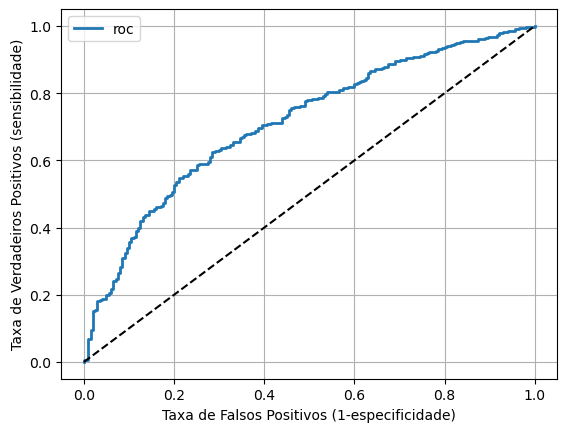

In [8]:
import os
os.environ['MLFLOW_TRACKING_URI'] = 'http://127.0.0.1:5000'
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

# criar experimento mlflow
mlflow.set_experiment('nbexperimento')

with mlflow.start_run(): #define contexto do experimento
    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    #metricas
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    log = log_loss(y_test, y_pred)

    #registrar metricas
    mlflow.log_metric('accuracy', acc)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('f1', f1)
    mlflow.log_metric('auc', auc)
    mlflow.log_metric('log', log)

    #graficos
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                                  display_labels=model.classes_)
    disp.plot()
    
    plt.savefig('confusion.png')
    plt.close()


    y_probas = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')
    y_scores = y_probas[:,1]
    tfp, tvp, thresholds = roc_curve(y_train, y_scores)
    def plot_roc_curve(tfp, tvp, label='roc'):
        plt.plot(tfp,tvp,linewidth=2,label=label)
        plt.plot([0,1],[0,1],'k--')
        plt.legend()
        plt.grid()
        plt.xlabel('Taxa de Falsos Positivos (1-especificidade)')
        plt.ylabel('Taxa de Verdadeiros Positivos (sensibilidade)')

    plot_roc_curve(tfp, tvp)
    plt.savefig('roc.png')

    #logar graficos
    mlflow.log_artifact('confusion.png')
    mlflow.log_artifact('roc.png')

    #modelo
    mlflow.sklearn.log_model(model, 'modeloNB')


    #info da execucao
    print('Modelo: ', mlflow.active_run().info.run_uuid)

mlflow.end_run()

#mlflow server --host 127.0.0.1 --port 5000

In [1]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
try:
    run_info = client.get_run('350602bf0f3f43618ab0246d47d70609')
    print(run_info)
    # Process run_info
except mlflow.exceptions.MlflowException as e:
    print(f'Run not found: {e}')

<Run: data=<RunData: metrics={'accuracy': 0.6966666666666667,
 'auc': 0.6600000000000001,
 'f1': 0.7719298245614035,
 'log': 10.933241528032204,
 'precision': 0.7738693467336684,
 'recall': 0.77}, params={}, tags={'mlflow.log-model.history': '[{"run_id": "350602bf0f3f43618ab0246d47d70609", '
                             '"artifact_path": "modeloNB", "utc_time_created": '
                             '"2024-12-03 13:34:18.680751", "model_uuid": '
                             '"bb73fb10bacb4b1494f2a729574818f2", "flavors": '
                             '{"python_function": {"model_path": "model.pkl", '
                             '"predict_fn": "predict", "loader_module": '
                             '"mlflow.sklearn", "python_version": "3.8.5", '
                             '"env": {"conda": "conda.yaml", "virtualenv": '
                             '"python_env.yaml"}}, "sklearn": '
                             '{"pickled_model": "model.pkl", '
                             '"sklea

In [9]:
#!mlflow models serve -m runs:/350602bf0f3f43618ab0246d47d70609/modeloNB -p 2345